In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("\\Users\\rosha\\Desktop\\UM Internship\\Personalized Healthcare Recommendations\\healthcare_dataset.csv")
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Drop unnecessary columns
data_clean = data.drop(columns=['Name', 'Date of Admission', 'Doctor', 'Hospital', 'Discharge Date', 'Room Number'])

# Define features and target label
X = data_clean.drop('Test Results', axis=1)  # Features
y = data_clean['Test Results']  # Target variable

# Identify numerical and categorical features
numerical_features = ['Age', 'Billing Amount']
categorical_features = ['Gender', 'Blood Type', 'Medical Condition', 'Admission Type', 'Insurance Provider', 'Medication']

# Create preprocessing pipelines
numerical_pipeline = Pipeline(steps=[('scaler', StandardScaler())])
categorical_pipeline = Pipeline(steps=[('encoder', OneHotEncoder(drop='first'))])

# Combine the preprocessing steps
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_pipeline, numerical_features),
    ('cat', categorical_pipeline, categorical_features)
])

# Split data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
from sklearn.ensemble import RandomForestClassifier

# Create a pipeline that includes preprocessing and the classifier
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Train the model
model_pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model_pipeline.predict(X_test)


Classification Report:
               precision    recall  f1-score   support

    Abnormal       0.43      0.44      0.43      3754
Inconclusive       0.43      0.43      0.43      3617
      Normal       0.44      0.44      0.44      3729

    accuracy                           0.43     11100
   macro avg       0.43      0.43      0.43     11100
weighted avg       0.43      0.43      0.43     11100



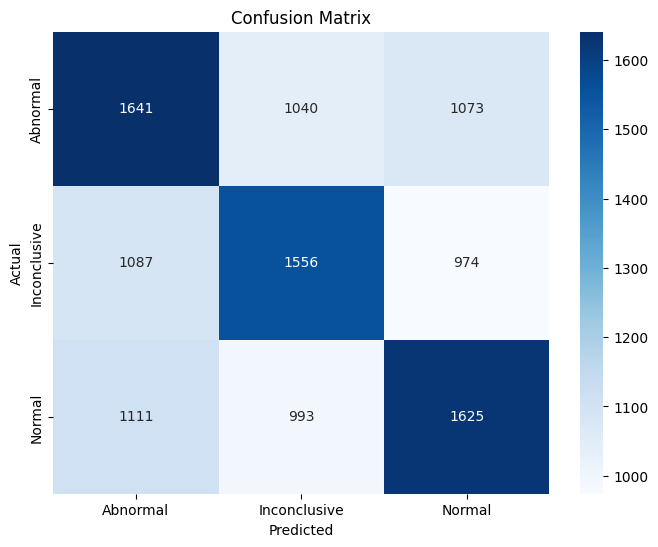

In [5]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluate the model's performance
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', xticklabels=model_pipeline.classes_, yticklabels=model_pipeline.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [6]:
# Function to generate personalized healthcare recommendations
def generate_recommendations(patient_data):
    prediction = model_pipeline.predict(patient_data)
    # Map predictions to actual recommendations (modify based on dataset specifics)
    recommendation_mapping = {
        'Normal': 'No specific action needed.',
        'Abnormal': 'Consult with a doctor for further examination.',
        'Inconclusive': 'Schedule a follow-up test.'
    }
    return recommendation_mapping[prediction[0]]

# Example: Generate recommendation for a new patient
example_patient_data = pd.DataFrame({
    'Age': [80],
    'Gender': ['Female'],
    'Blood Type': ['AB-'],
    'Medical Condition': ['Diabetes'],
    'Admission Type': ['Elective'],
    'Insurance Provider': ['Blue Cross'],
    'Billing Amount': [20257],
    'Medication': ['Penicillin']
})

# Generate recommendation for the example patient
print(generate_recommendations(example_patient_data))


Consult with a doctor for further examination.
